In [1]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.filterwarnings('ignore')
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import spacy


from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
exclude_list = ['but','no','because','against','not','than']
stop_words = set(stopwords.words('english'))
stop_words.difference_update(exclude_list)

[nltk_data] Downloading package punkt to C:\Users\Hitesh Kumar
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hitesh Kumar
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_train = pd.read_csv(r"D:\PROJECT EXPO\FULLY FUNCTIONAL\Drug Reviews (Drugs.com)\train_data.csv", on_bad_lines='skip')
df_test = pd.read_csv(r"D:\PROJECT EXPO\FULLY FUNCTIONAL\Drug Reviews (Drugs.com)\test_data.csv")

print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


In [3]:
df_data = pd.concat([df_train, df_test])
print (df_data.shape)

(215063, 7)


In [4]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,"November 27, 2016",37


In [5]:
df_data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [6]:
percent_missing = df_data.isnull().sum() * 100 / len(df_data)
missing_value_df = pd.DataFrame({'column_name': df_data.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
uniqueID,uniqueID,0.000000
drugName,drugName,0.000000
condition,condition,0.555186
review,review,0.000000
rating,rating,0.000000
date,date,0.000000
usefulCount,usefulCount,0.000000


In [7]:
print('Shape of df before dropping null values ',df_data.shape)
df_data.dropna(inplace=True)
df_data.reset_index(drop=True)
print('Shape of df after dropping null values ',df_data.shape)

Shape of df before dropping null values  (215063, 7)
Shape of df after dropping null values  (213869, 7)


In [8]:
#Converting to the correct Datetime
df_data['date'] = pd.to_datetime(df_data['date'])

In [9]:
df_data['condition'].value_counts().head(10)

condition
Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: count, dtype: int64

In [10]:
# now extracting year from date
df_data['year'] = df_data['date'].dt.year

# extracting the month from the date
df_data['month'] = df_data['date'].dt.month

# extracting the days from the date
df_data['day'] = df_data['date'].dt.day

<Axes: >

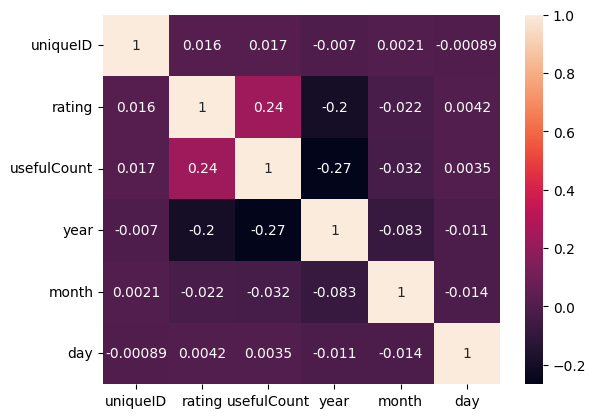

In [11]:
numerical_features = df_data.select_dtypes(include=['number']).columns
numerical_data = df_data[numerical_features]

# Generate the heatmap
sns.heatmap(numerical_data.corr(), annot=True)

In [12]:
df_data.reset_index(drop=True,inplace=True)

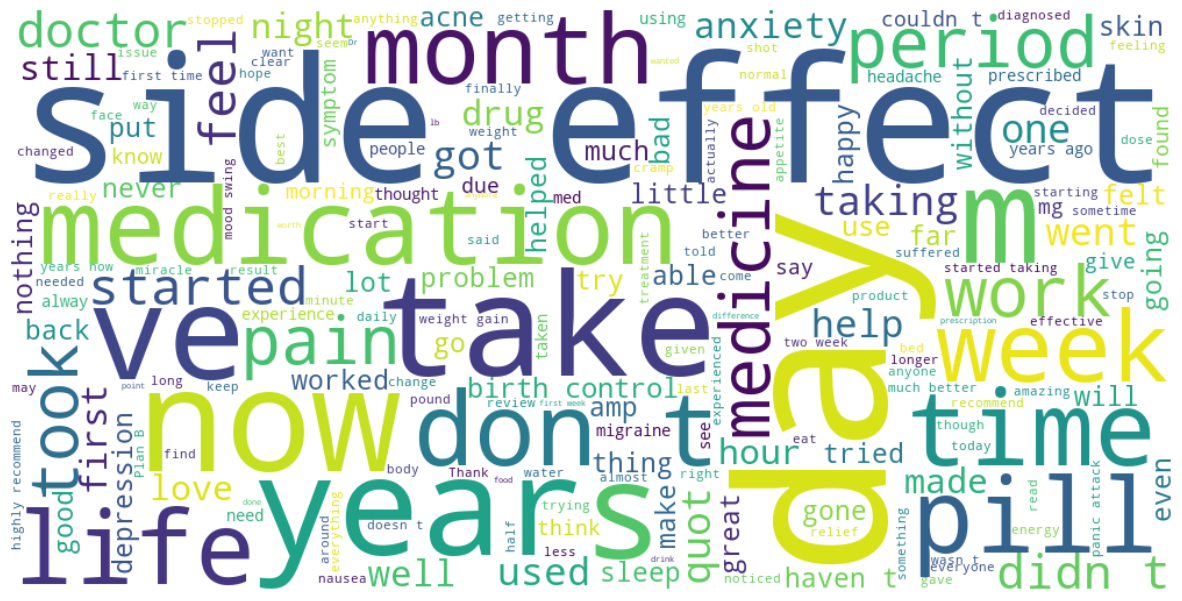

In [13]:
# Word cloud of the reviews with rating equal to 10

df_rate_ten = df_data.loc[df_data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

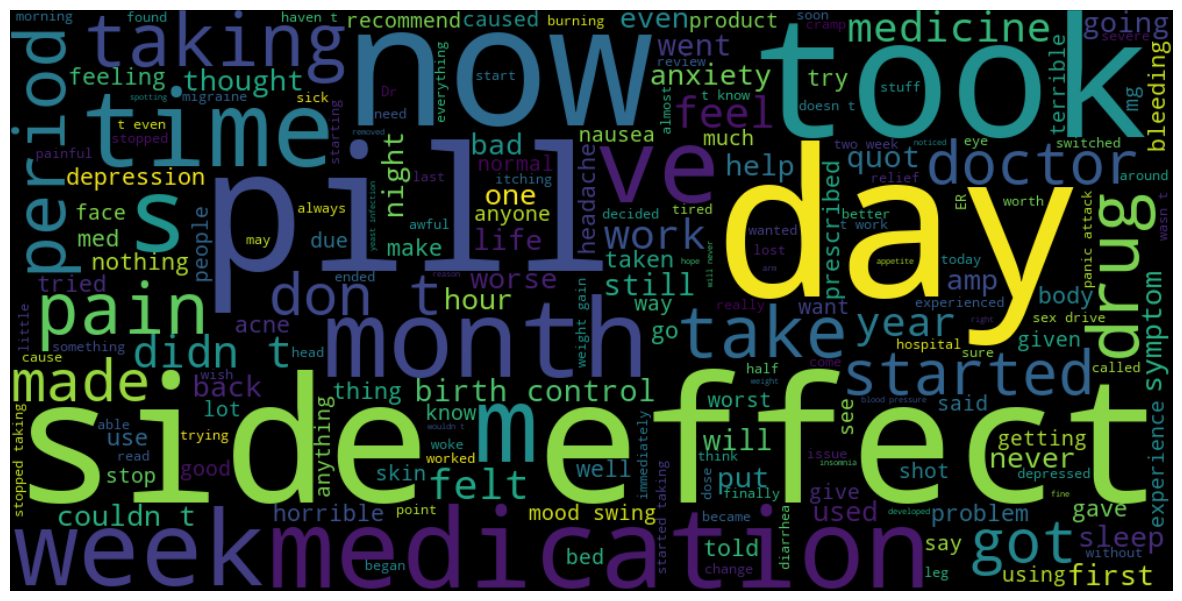

In [14]:
# Word cloud of the reviews with rating equal to 1

df_rate_one = df_data.loc[df_data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [15]:
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print('no of rows with "&#039" character are ',len(matched_list))

no of rows with "&#039" character are  133540


In [16]:
df_data['review'] = df_data['review'].str.replace('&#039;',"'")
lst = df_data['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print(len(matched_list))
matched_list

0


[]

In [17]:
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "doesn’t": "does not", "don't": "do not", "don’t": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
    "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
    "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not","might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
    "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y’all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", "ain’t": "am not", "aren’t": "are not",
    "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have",
    "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
    "hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have",
    "he’s": "he is", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
    "i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have",
    "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not",
    "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
    "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock",
    "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have",
    "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "she’s": "she is",
    "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "so’s": "so is",
    "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would", "there’d’ve": "there would have",
    "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will", "they’ll’ve": "they will have",
    "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have",
    "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
    "what’ll’ve": "what will have", "what’re": "what are", "what’s": "what is", "what’ve": "what have", "when’s": "when is",
    "when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will",
    "who’ll’ve": "who will have", "who’s": "who is", "who’ve": "who have","why’s": "why is", "why’ve": "why have", "will’ve": "will have",
    "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have",
    "y’all": "you all", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are",
    "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
    "you’re": "you are", "you’re": "you are", "you’ve": "you have"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)


df_data['review_clean'] = df_data['review'].apply(expand_contractions)

In [18]:
'''count = 0
def normalize_punc_lemmatize(text):
    global count
    count = count+1
    #normalizing the text by lowering to same case
    text = text.lower()
    #Removing the punctuations
    text_p = "".join([char for char in text if char not in string.punctuation])
    #Lemmatizing the text
    doc = nlp(text_p)
    sen = " ".join([token.lemma_ if token.lemma_ != '-PRON-' else str(token) for token in doc])
    #print(count)
    return sen


df_data['review_clean'] = df_data['review_clean'].apply(normalize_punc_lemmatize)'''

'count = 0\ndef normalize_punc_lemmatize(text):\n    global count\n    count = count+1\n    #normalizing the text by lowering to same case\n    text = text.lower()\n    #Removing the punctuations\n    text_p = "".join([char for char in text if char not in string.punctuation])\n    #Lemmatizing the text\n    doc = nlp(text_p)\n    sen = " ".join([token.lemma_ if token.lemma_ != \'-PRON-\' else str(token) for token in doc])\n    #print(count)\n    return sen\n\n\ndf_data[\'review_clean\'] = df_data[\'review_clean\'].apply(normalize_punc_lemmatize)'

In [19]:
df_clean_data = pd.read_csv(r"D:\PROJECT EXPO\FULLY FUNCTIONAL\Preprocessed.csv")
df_data['review_clean'] = df_clean_data['review_clean']


In [20]:
def preprocess(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [22]:
df_preprocess = pd.read_csv(r"D:\PROJECT EXPO\FULLY FUNCTIONAL\Preprocessed.csv")

In [ ]:
df_data['review_clean'] = df_preprocess['review_clean']

In [23]:
from textblob import TextBlob

def sentiment(review):
    pol = []
    for i in review:
        # Ensure the review is a string, and handle NaN or non-string entries
        if isinstance(i, str):  # Only process if it's a string
            analysis = TextBlob(i)
            pol.append(analysis.sentiment.polarity)
        else:
            pol.append(0)  # If it's not a valid string, append neutral sentiment (0)
    return pol

# Apply the sentiment function to both 'review' and 'review_clean'
df_data['sentiment'] = sentiment(df_data['review'].fillna(''))  # Replace NaN with empty string
df_data['sentiment_processed'] = sentiment(df_data['review_clean'].fillna(''))  # Replace NaN with empty string


In [24]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,review_clean,sentiment,sentiment_processed
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,it have no side effect I take it in combinatio...,0.000000,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,my son be halfway through his fourth week of i...,0.168333,0.152143
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,I use to take another oral contraceptive which...,0.067210,0.045489
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,this be my first time use any form of birth co...,0.179545,0.211364
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,suboxone have completely turn my life around ...,0.194444,0.242333


In [25]:
#Word count in each review
df_data['word_count']=df_data["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count
df_data['unique_word_count']=df_data["review_clean"].apply(lambda x: len(set(str(x).split())))

#punctuation count
df_data["count_punc"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["upper_word_count"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["title_word_count"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["stopword_count"] = df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#mean length of the words
df_data["mean_word_len"] = df_data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [26]:
df_data["mean_word_len"] = df_data["mean_word_len"].fillna(0)

In [27]:
#label encoding for drugname and condition columns
label_encoder_drug= LabelEncoder()
label_encoder_condition = LabelEncoder()
df_data['edrugName'] = label_encoder_drug.fit_transform(df_data['drugName'])
df_data['econdition'] = label_encoder_condition.fit_transform(df_data['condition'])

In [28]:
df_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,year,month,day,...,sentiment_processed,word_count,unique_word_count,count_punc,upper_word_count,title_word_count,stopword_count,mean_word_len,edrugName,econdition
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,...,0.000000,17,16,3,1,6,6,3.588235,3421,480
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,...,0.152143,141,91,23,2,13,68,3.858156,1536,80
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,...,0.045489,136,78,30,6,15,57,4.029412,1983,175
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,...,0.211364,90,51,13,4,9,43,3.577778,2446,175
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,...,0.242333,128,78,20,7,15,61,4.031250,553,593


In [29]:
# Giving the Sentiment according to the ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [30]:
X_train = df_data[df_data['uniqueID'].isin(df_train['uniqueID'])].filter(['econdition','year','month','day','word_count', 'usefulCount',
                                                                          'sentiment_processed','unique_word_count','upper_word_count',
                                                                          'count_punc','title_word_count','stopword_count','mean_word_len'])
X_test = df_data[df_data['uniqueID'].isin(df_test['uniqueID'])].filter(['econdition','year','month','day','word_count', 'usefulCount',
                                                                          'sentiment_processed','unique_word_count','upper_word_count',
                                                                          'count_punc','title_word_count','stopword_count','mean_word_len'])
y_train = df_data[df_data['uniqueID'].isin(df_train['uniqueID'])]['sentiment_rate']
y_test = df_data[df_data['uniqueID'].isin(df_test['uniqueID'])]['sentiment_rate']

In [31]:
X_test




,econdition,year,month,day,word_count,usefulCount,sentiment_processed,unique_word_count,upper_word_count,count_punc,title_word_count,stopword_count,mean_word_len
160398,273,2012,2,28,70,22,0.000000,51,2,18,4,24,4.742857
160399,253,2009,5,17,49,17,0.462500,40,0,9,4,20,3.877551
160400,847,2017,9,29,4,3,0.333333,4,0,2,1,1,5.750000
160401,869,2017,3,5,149,35,0.123558,94,10,30,14,72,3.758389
160402,175,2015,10,22,154,4,0.201275,85,10,13,17,75,3.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213864,190,2014,9,13,96,43,-0.005952,65,16,13,17,40,4.239583
213865,133,2016,10,8,135,11,0.033820,78,10,28,17,53,4.133333
213866,175,2010,11,15,151,7,-0.075956,90,11,22,17,71,3.649007
213867,613,2011,11,28,35,20,0.000000,28,4,7,5,14,4.285714


In [32]:
clf = LGBMClassifier(
        n_estimators=30000,
        learning_rate=0.3,
        num_leaves=200,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        verbose=-1,
)
model = clf.fit(X_train, y_train)

# Predictions
predictions_ml = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_ml), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_ml), '\n')

print (classification_report(y_test, predictions_ml))

The Accuracy of the model is :  0.8957004731536721 

The confusion Matrix is 

[[12774  3345]
 [ 2232 35120]] 

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     16119
           1       0.91      0.94      0.93     37352

    accuracy                           0.90     53471
   macro avg       0.88      0.87      0.87     53471
weighted avg       0.89      0.90      0.89     53471



In [33]:
xgb_clf = XGBClassifier(
                n_estimators = 10000 , 
                learning_rate = 0.5 , 
                max_depth= 7 , 
                subsample = 0.8 , 
                reg_alpha =  0.1 , 
                reg_lambda = 0.1 , 
                
)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_xgb = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_xgb), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_xgb), '\n')

print (classification_report(y_test, predictions_xgb))

The Accuracy of the model is :  0.8894915000654561 

The confusion Matrix is 

[[12767  3352]
 [ 2557 34795]] 

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     16119
           1       0.91      0.93      0.92     37352

    accuracy                           0.89     53471
   macro avg       0.87      0.86      0.87     53471
weighted avg       0.89      0.89      0.89     53471



In [34]:
X_train["mean_word_len"] = df_data["mean_word_len"].fillna(0)
X_test["mean_word_len"] = df_data["mean_word_len"].fillna(0)

LR: 0.703301 (0.000657)
[[  151 15968]
 [   97 37255]] 

              precision    recall  f1-score   support

           0       0.61      0.01      0.02     16119
           1       0.70      1.00      0.82     37352

    accuracy                           0.70     53471
   macro avg       0.65      0.50      0.42     53471
weighted avg       0.67      0.70      0.58     53471

LDA: 0.745059 (0.001604)
[[ 4529 11590]
 [ 2171 35181]] 

              precision    recall  f1-score   support

           0       0.68      0.28      0.40     16119
           1       0.75      0.94      0.84     37352

    accuracy                           0.74     53471
   macro avg       0.71      0.61      0.62     53471
weighted avg       0.73      0.74      0.70     53471

KNN: 0.709236 (0.000976)
[[ 7133  8986]
 [ 5770 31582]] 

              precision    recall  f1-score   support

           0       0.55      0.44      0.49     16119
           1       0.78      0.85      0.81     37352

    accur

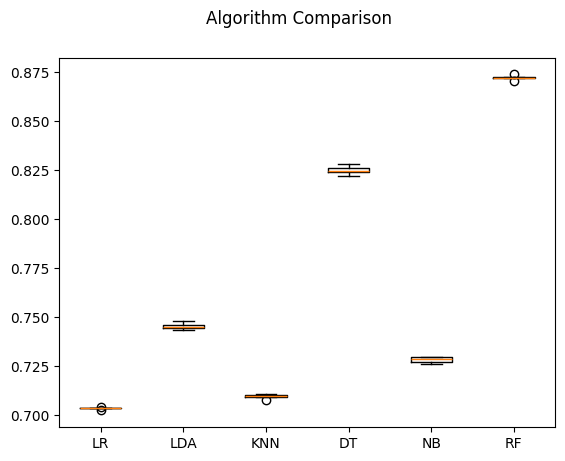

In [35]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    m = model.fit(X_train,y_train)
    predictions_3 = m.predict(X_test)
    print (confusion_matrix(y_test, predictions_3), '\n')
    print (classification_report(y_test, predictions_3))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
X_train_features = df_data[df_data['uniqueID'].isin(df_train['uniqueID'])].filter(['review_clean'])
X_test_features = df_data[df_data['uniqueID'].isin(df_test['uniqueID'])].filter(['review_clean'])
y_train_ngram = df_data[df_data['uniqueID'].isin(df_train['uniqueID'])]['sentiment_rate']
y_test_ngram = df_data[df_data['uniqueID'].isin(df_test['uniqueID'])]['sentiment_rate']

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(analyzer='word',
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             min_df=2,
                             ngram_range=(1, 3),
                             max_features=20000)

# Replace NaN values with an empty string before fitting the vectorizer
X_train_cleaned = X_train_features['review_clean'].fillna('')
X_test_cleaned = X_test_features['review_clean'].fillna('')

# Apply the vectorizer
X_train_ngram = vectorizer.fit_transform(X_train_cleaned).astype(float)
X_test_ngram = vectorizer.transform(X_test_cleaned).astype(float)

# Check the vectorizer
vectorizer


TfidfVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [40]:
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=205, random_state=42)
# X_train_ngram_reduced = svd.fit_transform(X_train_ngram)
# X_test_ngram_reduced = svd.transform(X_test_ngram)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# # Step 1: Apply SMOTE
# print("Original class distribution:", Counter(y_train_ngram))
# smote = SMOTE(random_state=42)  # Default oversampling strategy (equalize minority to majority class)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_ngram, y_train_ngram)
# print("After SMOTE:", Counter(y_train_smote))







In [41]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Check original class distribution
print("Original class distribution:", Counter(y_train_ngram))

# Apply RandomUnderSampler to balance the classes
# Here, we use sampling_strategy='auto', which will reduce the majority class to match the minority class size
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling to the training data
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_ngram, y_train_ngram)

# Check the new class distribution after undersampling
print("After undersampling:", Counter(y_train_resampled))


Original class distribution: Counter({1: 112611, 0: 47787})
After undersampling: Counter({0: 47787, 1: 47787})


In [42]:
X_test['ml_pred'] = predictions_ml
X_test['ngrams_pred'] = 2

In [43]:
X_test['final_pred'] = X_test['ml_pred']+0.2*X_test['usefulCount']

In [44]:
X_test

,econdition,year,month,day,word_count,usefulCount,sentiment_processed,unique_word_count,upper_word_count,count_punc,title_word_count,stopword_count,mean_word_len,ml_pred,ngrams_pred,final_pred
160398,273,2012,2,28,70,22,0.000000,51,2,18,4,24,4.742857,1,2,5.4
160399,253,2009,5,17,49,17,0.462500,40,0,9,4,20,3.877551,1,2,4.4
160400,847,2017,9,29,4,3,0.333333,4,0,2,1,1,5.750000,1,2,1.6
160401,869,2017,3,5,149,35,0.123558,94,10,30,14,72,3.758389,1,2,8.0
160402,175,2015,10,22,154,4,0.201275,85,10,13,17,75,3.681818,1,2,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213864,190,2014,9,13,96,43,-0.005952,65,16,13,17,40,4.239583,1,2,9.6
213865,133,2016,10,8,135,11,0.033820,78,10,28,17,53,4.133333,1,2,3.2
213866,175,2010,11,15,151,7,-0.075956,90,11,22,17,71,3.649007,1,2,2.4
213867,613,2011,11,28,35,20,0.000000,28,4,7,5,14,4.285714,0,2,4.0


In [45]:
X_test['drugName'] = df_data[df_data['uniqueID'].isin(df_test['uniqueID'])]['drugName']
X_test['condition'] = df_data[df_data['uniqueID'].isin(df_test['uniqueID'])]['condition']

In [46]:
X_test

,econdition,year,month,day,word_count,usefulCount,sentiment_processed,unique_word_count,upper_word_count,count_punc,title_word_count,stopword_count,mean_word_len,ml_pred,ngrams_pred,final_pred,drugName,condition
160398,273,2012,2,28,70,22,0.000000,51,2,18,4,24,4.742857,1,2,5.4,Mirtazapine,Depression
160399,253,2009,5,17,49,17,0.462500,40,0,9,4,20,3.877551,1,2,4.4,Mesalamine,"Crohn's Disease, Maintenance"
160400,847,2017,9,29,4,3,0.333333,4,0,2,1,1,5.750000,1,2,1.6,Bactrim,Urinary Tract Infection
160401,869,2017,3,5,149,35,0.123558,94,10,30,14,72,3.758389,1,2,8.0,Contrave,Weight Loss
160402,175,2015,10,22,154,4,0.201275,85,10,13,17,75,3.681818,1,2,1.8,Cyclafem 1 / 35,Birth Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213864,190,2014,9,13,96,43,-0.005952,65,16,13,17,40,4.239583,1,2,9.6,Tamoxifen,"Breast Cancer, Prevention"
213865,133,2016,10,8,135,11,0.033820,78,10,28,17,53,4.133333,1,2,3.2,Escitalopram,Anxiety
213866,175,2010,11,15,151,7,-0.075956,90,11,22,17,71,3.649007,1,2,2.4,Levonorgestrel,Birth Control
213867,613,2011,11,28,35,20,0.000000,28,4,7,5,14,4.285714,0,2,4.0,Tapentadol,Pain


In [51]:
import tkinter as tk
from tkinter import ttk, messagebox
from threading import Timer

# Function to search for a condition
def search_condition(event=None):  # Event added for "Enter" key binding
    con = condition_combobox.get().strip()
    if not con:
        messagebox.showerror("Input Error", "Please select or enter a condition.")
        return

    # Filter and process the DataFrame
    try:
        result_df = (
            X_test.groupby('condition')
            .get_group(con)
            .sort_values('final_pred', ascending=False)
            .drop_duplicates('drugName', keep='first')
            .head(5)[['drugName', 'usefulCount', 'final_pred']]
        )
    except KeyError:
        messagebox.showerror("Not Found", f"No data found for condition: {con}")
        return

    # Clear existing data in the Treeview
    for row in tree.get_children():
        tree.delete(row)

    # Insert new data
    for _, row in result_df.iterrows():
        tree.insert("", tk.END, values=(row['drugName'], row['usefulCount'], row['final_pred']))

# Auto-complete logic with live suggestions
typing_timer = None

def auto_complete(event):
    global typing_timer

    def suggest():
        value = condition_combobox.get().strip()
        if value == '':
            condition_combobox['values'] = unique_conditions
        else:
            data = [item for item in unique_conditions if value.lower() in item.lower()]
            condition_combobox['values'] = data

    # Cancel any previous timer and set a new one
    if typing_timer is not None:
        typing_timer.cancel()
    typing_timer = Timer(0.3, suggest)  # 0.3-second delay for auto-completion
    typing_timer.start()

# Create the Tkinter GUI
root = tk.Tk()
root.title("Drug Finder Tool")
root.geometry("900x550")
root.configure(bg="#f5f5f5")  # Light background color
root.resizable(False, False)

# Define the main frame for better layout
main_frame = ttk.Frame(root, padding="10")
main_frame.pack(fill=tk.BOTH, expand=True)

# Title Label
title_label = ttk.Label(
    main_frame,
    text="🔍 Drug Finder by Condition",
    font=("Helvetica", 20, "bold"),
    anchor="center",
    foreground="#333333"  # Dark gray color
)
title_label.pack(pady=20)

# Subtitle for clarity
subtitle_label = ttk.Label(
    main_frame,
    text="Search for the most effective drugs based on a specific condition.",
    font=("Helvetica", 12),
    anchor="center",
    foreground="#555555"  # Medium gray color
)
subtitle_label.pack(pady=5)

# Input Section
input_frame = ttk.Frame(main_frame, padding="10")
input_frame.pack(fill=tk.X, pady=10)

condition_label = ttk.Label(input_frame, text="Condition:", font=("Helvetica", 12, "bold"))
condition_label.pack(side=tk.LEFT, padx=5)

# Fetch unique conditions for the dropdown
unique_conditions = sorted(X_test['condition'].unique())  # Sorted unique conditions for better UX

# Create a combobox for conditions
condition_combobox = ttk.Combobox(input_frame, values=unique_conditions, width=50, font=("Helvetica", 12))
condition_combobox.pack(side=tk.LEFT, padx=10)
condition_combobox.bind("<KeyRelease>", auto_complete)  # Auto-completion for typing

# Search button
search_button = ttk.Button(input_frame, text="Search", command=search_condition)
search_button.pack(side=tk.LEFT, padx=5)

# Bind "Enter" key to trigger search
root.bind('<Return>', search_condition)

# Treeview to display results
results_frame = ttk.Frame(main_frame, padding="10")
results_frame.pack(fill=tk.BOTH, expand=True)

columns = ("Drug Name", "Useful Count", "Final Prediction")
tree = ttk.Treeview(results_frame, columns=columns, show="headings", height=10)
for col in columns:
    tree.heading(col, text=col, anchor="center")
    tree.column(col, anchor="center", width=250)

# Add a scrollbar to the Treeview
scrollbar = ttk.Scrollbar(results_frame, orient=tk.VERTICAL, command=tree.yview)
tree.configure(yscroll=scrollbar.set)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
tree.pack(fill=tk.BOTH, expand=True)

# Footer
footer_label = ttk.Label(
    main_frame,
    text="Powered by Your DataFrame | © 2024",
    font=("Helvetica", 10, "italic"),
    anchor="center",
    foreground="#777777"  # Light gray color
)
footer_label.pack(side=tk.BOTTOM, pady=10)

# Run the Tkinter event loop
root.mainloop()


In [ ]:
'''# Create a dictionary where drug names are keys and corresponding conditions are values
drug_dict = df.groupby('drugName')['condition'].apply(lambda x: ', '.join(x.unique())).to_dict()

# Print the resulting dictionary
print(drug_dict) 
'''

In [ ]:
'''import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox


drug_condition_dict = drug_dict
X_test = pd.DataFrame(drug_condition_dict)

# Tkinter GUI
def search_condition():
    con = condition_entry.get()
    if not con:
        messagebox.showerror("Input Error", "Please enter a condition.")
        return

    try:
        result_df = (
            X_test.groupby('condition')
            .get_group(con)
            .sort_values('final_pred', ascending=False)
            .drop_duplicates('drugName', keep='first')
            .head(5)[['drugName', 'usefulCount', 'final_pred']]
        )
    except KeyError:
        messagebox.showerror("Not Found", f"No data found for condition: {con}")
        return

    # Clear existing data in the treeview
    for row in tree.get_children():
        tree.delete(row)

    # Insert new data
    for _, row in result_df.iterrows():
        tree.insert("", tk.END, values=(row['drugName'], row['usefulCount'], row['final_pred']))

# Create main window
root = tk.Tk()
root.title("Drug Information Finder")
root.geometry("600x400")

# Condition input
tk.Label(root, text="Enter Condition:").pack(pady=5)
condition_entry = tk.Entry(root, width=30)
condition_entry.pack(pady=5)

search_button = tk.Button(root, text="Search", command=search_condition)
search_button.pack(pady=10)

# Treeview for displaying results
columns = ("Drug Name", "Useful Count", "Final Prediction")
tree = ttk.Treeview(root, columns=columns, show="headings")
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, width=150)

tree.pack(pady=20, fill=tk.BOTH, expand=True)

# Run the Tkinter loop
root.mainloop()
'''